<table align="left">
  <td>
    <a href="https://colab.research.google.com/drive/1d8lmQCL40i0rGj_qMFjj5dUXdQYR_ixe" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

---

# **Licencia**

**Autor**: Juan Francisco Puentes Calvo

**Licencia**: GPL v3 (https://www.gnu.org/licenses/gpl-3.0.html)


# **Reconocimientos**

* Ninguno, por ahora.

---

## segmentación de imágenes (GPU)

error: externally-managed-environment

× This environment is externally managed
╰─> To install Python packages system-wide, try apt install
    python3-xyz, where xyz is the package you are trying to
    install.
    
    If you wish to install a non-Debian-packaged Python package,
    create a virtual environment using python3 -m venv path/to/venv.
    Then use path/to/venv/bin/python and path/to/venv/bin/pip. Make
    sure you have python3-full installed.
    
    If you wish to install a non-Debian packaged Python application,
    it may be easiest to use pipx install xyz, which will manage a
    virtual environment for you. Make sure you have pipx installed.
    
    See /usr/share/doc/python3.12/README.venv for more information.

note: If you believe this is a mistake, please contact your Python installation or OS distribution provider. You can override this, at the risk of breaking your Python installation or OS, by passing --break-system-packages.
hint: See PEP 668 for the detai

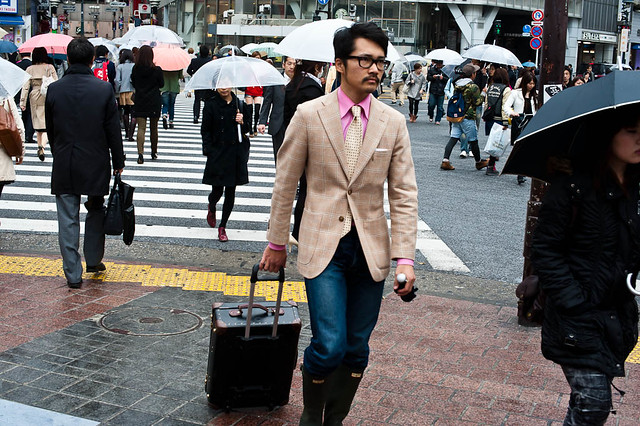

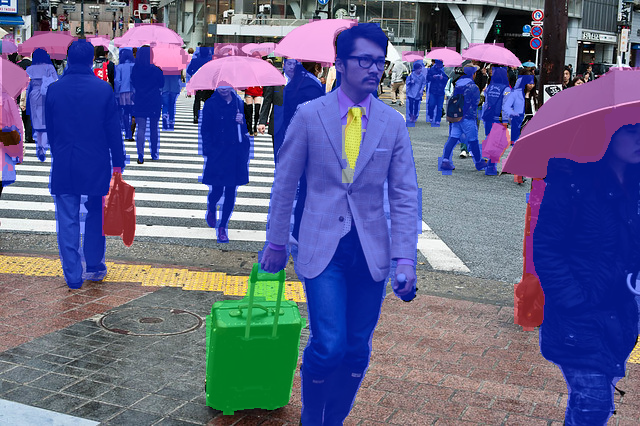

In [1]:
# prompt: Dada una imagen referenciada mediante una url, llevar a cabo la segmentación de la misma usando YOLO v8. Mostrar la imagen original y la imagen segmentada. No almacenar las imágenes en ficheros.

!pip -q install ultralytics

from ultralytics import YOLO
from IPython.display import display, Image
import requests
import PIL
from io import BytesIO

def segment_image(image_url):
  # Load a model
  model = YOLO('yolov8n-seg.pt')  # load a pretrained model (recommended for training)

  # Predict with the model
  response = requests.get(image_url)
  image_bytes = BytesIO(response.content)
  image = PIL.Image.open(image_bytes) # Open the image bytes as a PIL Image
  results = model(image)  # predict on the PIL Image

  # Display the original image
  display(image)

  # Display the segmented image
  image=PIL.Image.fromarray(results[0].plot(labels=False, boxes=False, probs=False))
  image = image.convert("RGB")
  r, g, b = image.split()
  image = PIL.Image.merge("RGB", (b, g, r))
  display(image)

# Example usage
image_url = 'https://farm8.staticflickr.com/7247/7042354841_5f188e569d_z.jpg'
segment_image(image_url)